In [1]:
# ただの線形回帰やっていく

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# jupyter内で描画するためのおまじない
%matplotlib inline 

In [2]:
# 入力処理
train = pd.read_csv("./input/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("./input/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# 後から気づいたけど線形回帰でLabelEncoderってLabelEncodingの与えられる数値の大小が特徴に合わせてエンコーディングされるわけではないから
# やる意味なしかな？ とりあえず数値にして相関係数みてやろうというモチベーションだった
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        le = LabelEncoder()
        train[train.columns.values[i]] = train[train.columns.values[i]].fillna('NaN')
        # テストデータもエンコードしておく
        le.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = le.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = le.transform(list(test.iloc[:,i].values))
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,0,3,4,1,0,4,2010,8,4,142125


In [5]:
# 相関係数を表示
corrmat = train.corr()
corrmat

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,-0.002855,0.032122,-0.019659,0.013324,...,0.057044,-0.033928,-0.000399,-0.038103,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,0.099430,0.119289,-0.002940,-0.022844,...,0.008283,-0.005221,0.086360,-0.046881,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.368086,0.061887,-0.017854,-0.001192,...,-0.003128,0.002882,-0.061289,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,-0.066880,-0.169641,-0.080757,NaN,...,0.206167,-0.195051,-0.040862,0.010689,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,-0.029676,-0.165315,-0.149083,0.010123,...,0.077672,-0.065167,0.036031,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.011200,0.001205,0.003690,-0.011274,-0.033455,-0.011599,-0.051552,...,-0.033737,0.036368,-0.009892,0.013957,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.015176,0.036449,0.020507,0.023353,...,-0.059689,0.060904,-0.035366,0.057708,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.034559,0.012292,0.014339,0.001092,-0.000911,-0.025754,-0.126770,...,0.011009,-0.013592,-0.006154,-0.003340,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.063372,0.034169,0.006064,-0.000162,-0.038118,0.033809,-0.089701,...,-0.067251,0.097425,0.100675,-0.008074,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [6]:
# 上の相関係数の表のSalePriceの列から値が大きいカラムの上位10個を取得
# OverallQualは家の素材と仕上げの評価
# GrLivAreaは居住面積
# GarageCarsはガレージの車のキャパ
# GarageAreaはガレージの面積
# TotalBsmtSFは地下室の面積
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [23]:
# ちなみに負の相関top5
# ExterQualは外装材の品質
# BsmtQualは地下室の高さ
#（多分Label Encodingで適当にマッピングしたからExcellentが0でPoorが5になったりしてるから負の相関が発生している？）
# Q.負の相関を使って回帰することももちろんあるよね？
scols = corrmat.nsmallest(10, 'SalePrice')['SalePrice']
scols

ExterQual      -0.636884
BsmtQual       -0.593734
KitchenQual    -0.589189
GarageFinish   -0.425684
GarageType     -0.415283
HeatingQC      -0.400178
BsmtExposure   -0.294589
LotShape       -0.255580
MSZoning       -0.166872
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

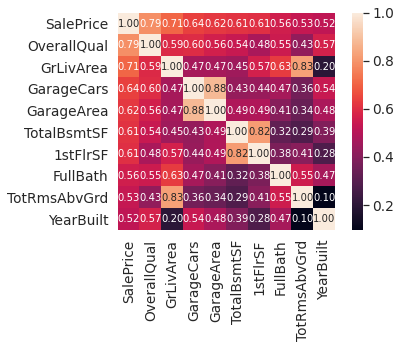

In [8]:
# http://mcn-www.jwu.ac.jp/~kuto/kogo_lab/psi-home/stat2000/DATA/09/05.HTM
# 相関係数0.7以上だと強い相関があるっぽい？　OverallQualとGrLivArea
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

# 相関ヒートマップ作ってみた　
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

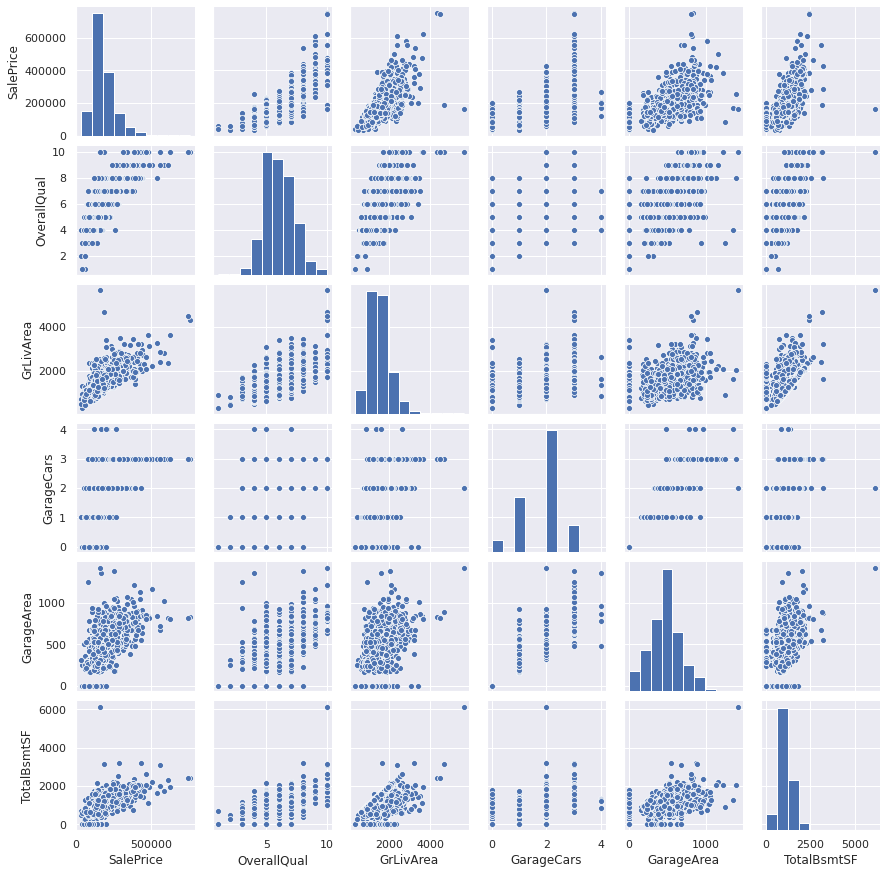

In [9]:
# 散布図
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF']
sns.pairplot(train[cols], height = 2.0)
plt.show()

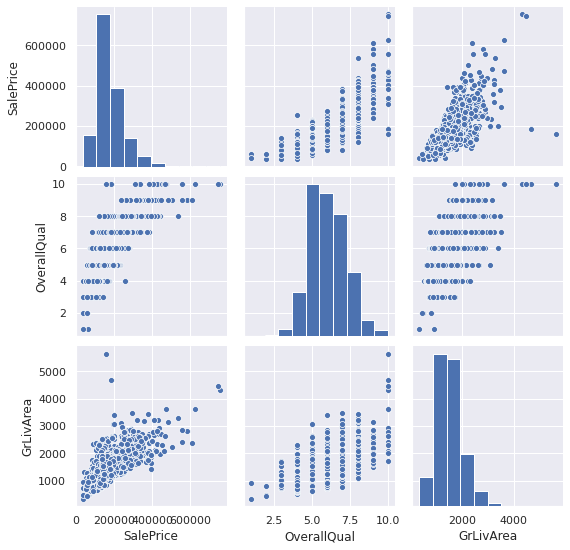

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train[cols], height = 2.5)
plt.show()

In [11]:
# GrLivAreaに外れ値っぽいやつがいるので表示
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,3,313.0,63887,1,1,2,0,0,...,480,2,4,1,0,1,2008,6,5,160000
523,524,60,3,130.0,40094,1,1,0,0,0,...,0,3,4,1,0,10,2007,6,5,184750


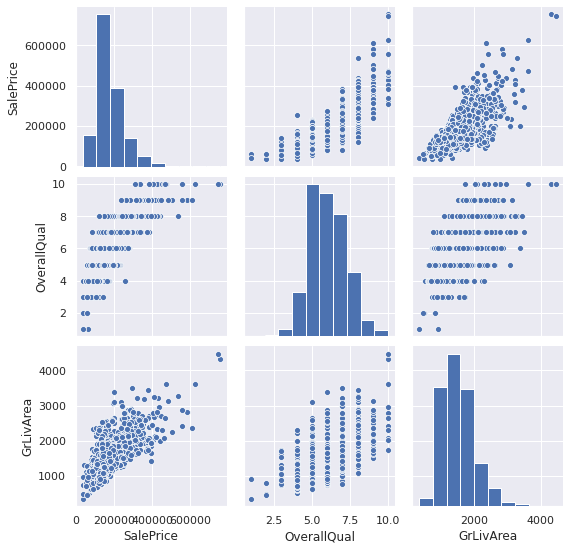

In [12]:
# 外れ値削除
train = train.drop(index = train[train['Id'] == 1299].index)
train = train.drop(index = train[train['Id'] == 524].index)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train[cols], height = 2.5)
plt.show()

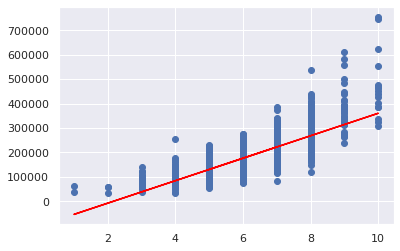

In [13]:
# 1.OverallQualで単回帰
X = train[["OverallQual"]].values
y = train["SalePrice"].values
slr = LinearRegression()
slr.fit(X,y)
plt.scatter(X,y)
plt.plot(X,slr.predict(X),color='red')
plt.show()

In [14]:
X_test = test[["OverallQual"]].values

y_test_pred = slr.predict(X_test)
y_test_pred

array([130652.55395085, 176614.16670299, 130652.55395085, ...,
       130652.55395085, 130652.55395085, 222575.77945513])

In [15]:
test["SalePrice"] = y_test_pred
test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,130652.553951
1,1462,176614.166703
2,1463,130652.553951
3,1464,176614.166703
4,1465,268537.392207


In [16]:
# test[["Id","SalePrice"]].to_csv("submission.csv",index=False)
# Score 1.00484
# RMSE（二乗平均平方根誤差）なので小さい方が良い

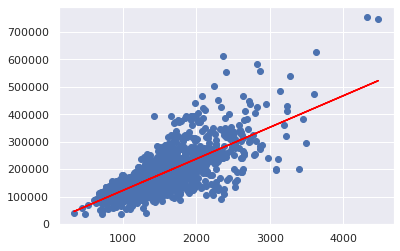

In [17]:
# 'GrLivArea'で単回帰
X = train[["GrLivArea"]].values
y = train["SalePrice"].values
slr = LinearRegression()
slr.fit(X,y)
plt.scatter(X,y)
plt.plot(X,slr.predict(X),color='red')
plt.show()

In [18]:
X_test = test[["GrLivArea"]].values

y_test_pred = slr.predict(X_test)
y_test_pred
test["SalePrice"] = y_test_pred
test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,110244.794647
1,1462,160057.107284
2,1463,194569.102182
3,1464,191693.102607
4,1465,154420.148117


In [19]:
#test[["Id","SalePrice"]].to_csv("submission.csv",index=False)
# Score 0.28990 こっちの方が良いじゃん

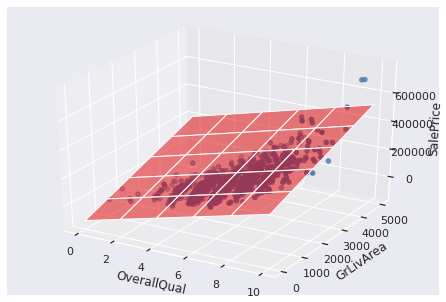

In [20]:
# OverallQualとGrLivAreaで重回帰
X = train[["OverallQual", "GrLivArea"]].values
y = train["SalePrice"].values
slr = LinearRegression()
slr.fit(X,y)

a1, a2 = slr.coef_
b = slr.intercept_
x, y, z = np.array(train["OverallQual"]), np.array(train["GrLivArea"]), np.array(train["SalePrice"].values)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z))
X, Y = np.meshgrid(np.arange(0, 12, 2), np.arange(0, 6000, 1000))
Z = a1 * X + a2 * Y + b
ax.plot_surface(X, Y, Z, alpha = 0.5, color = "red")
ax.set_xlabel("OverallQual")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")

plt.show()

In [21]:
X_test = test[["OverallQual", "GrLivArea"]].values

y_test_pred = slr.predict(X_test)
y_test_pred
test["SalePrice"] = y_test_pred
test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,106636.064015
1,1462,166343.295470
2,1463,153388.778205
3,1464,183883.536127
4,1465,227396.594008


In [22]:
test[["Id","SalePrice"]].to_csv("submission.csv",index=False)
# Score 0.77870 GrLivArea単回帰の方がよかった

In [ ]:
# 普通に考えると相関係数が高い方が線形回帰はよくなりそうやけど